<a href="https://colab.research.google.com/github/Fcazarez/Ecuador_Data_Science/blob/main/Reto_grupal_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RETO GRUPAL**
## Nombre del grupo:
## Integrantes del grupo:
## Fecha:

**Descripción del reto:** La empresa Juguetón contrata a Ciencia de Datos Ecuador para una consultoría de ciencia de datos.

* El gerente de mercadeo de Juguetón precide el proyecto e indica que el objetivo es encontrar la mejor ruta de marketing para el lanzamiento de su nuevo juguete "IG-NA".

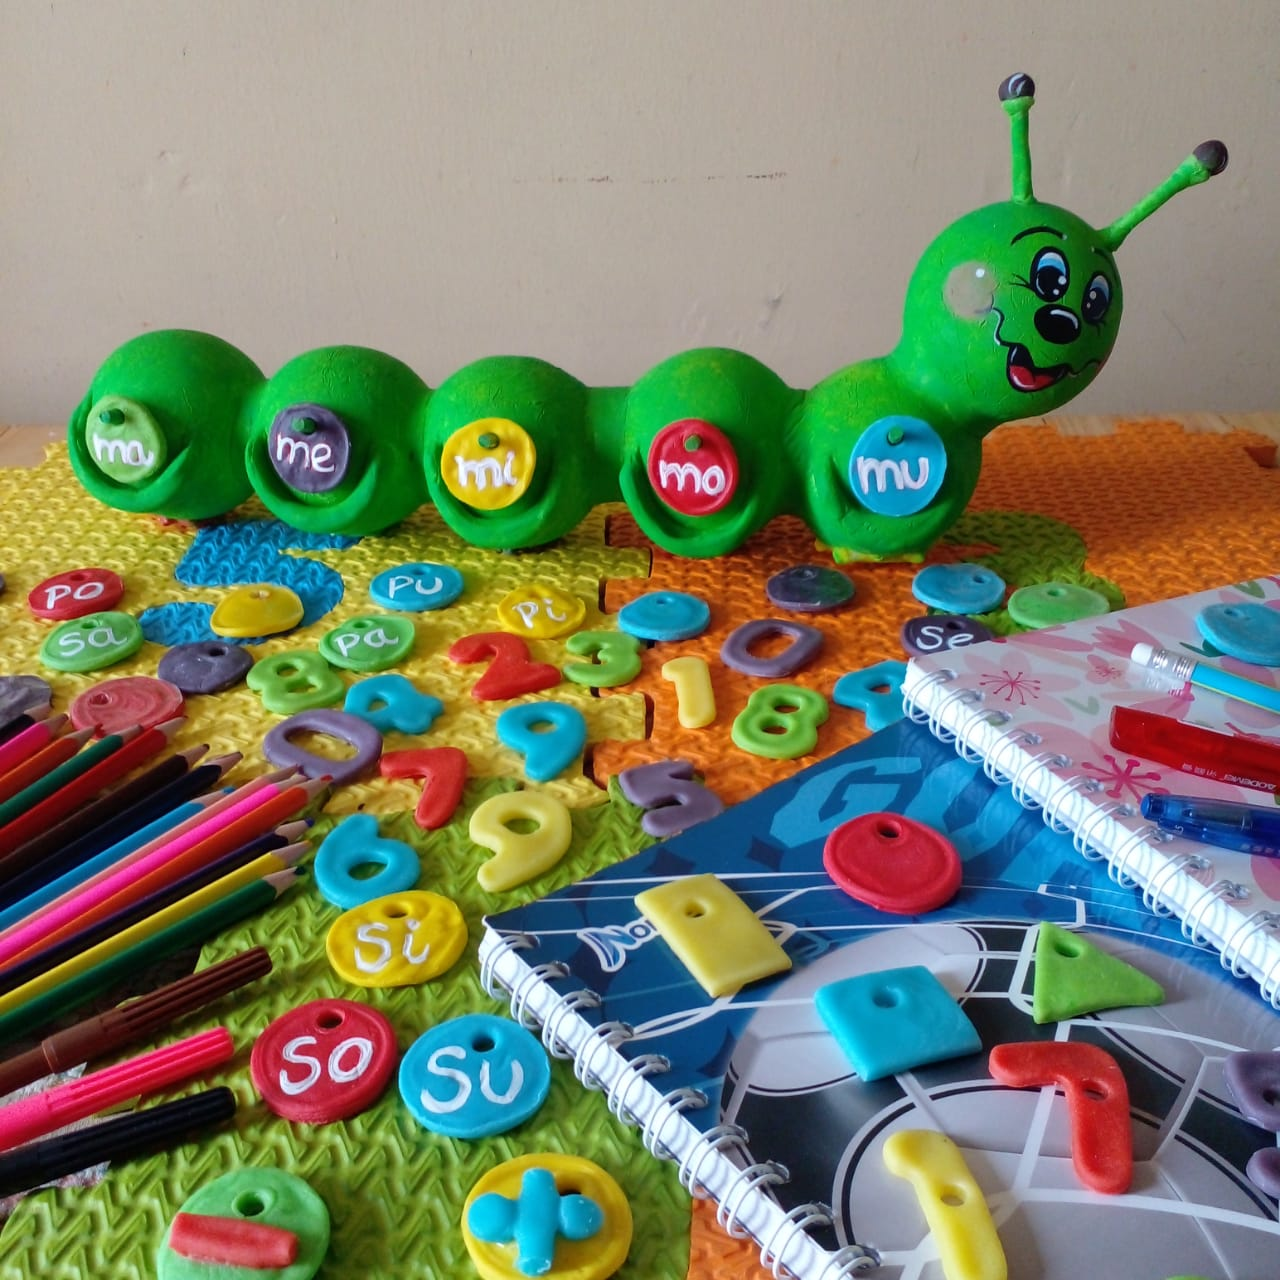

**Pasos a seguir**

1. Es necesario valorar con qué información Juguetón cuenta para este lanzamiento.

Para ello el Gerente de Tecnología nos ha proporcionado tres bases de datos.

*   Act_1
*   Act_2
*   Act_3

El Gerente de tecnología indica que son bases de datos que ha encontrado en su repositorio y que hacen referencia a los clientes potenciales.

Para este reto se solicita: explocar las 3 bases de datos y entregar un informe para la junta directiva Juguetón-Ciencia de Datos Ecuador sobre el estado de las 3 bases de datos.

El cliente (Juguetón) espera que al menos 1 de las bases sea útil para realizar el análisis.

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import pandas as pd
df_act1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ciencia de Datos Ec/Python/Clase 12 Introduccion a la visualizaci[on de datos/Viz/Viz/act_1.csv', sep=';')
df_act2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ciencia de Datos Ec/Python/Clase 12 Introduccion a la visualizaci[on de datos/Viz/Viz/act_2.csv', sep=';')
df_act3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ciencia de Datos Ec/Python/Clase 12 Introduccion a la visualizaci[on de datos/Viz/Viz/act_3.csv', sep=';')



In [11]:
df_act1.shape

(18355, 9)

In [12]:
df_act2.shape


(18355, 9)

In [13]:
df_act3.shape

(18355, 10)

In [20]:
df_act1.head()

,Unnamed: 0,CustomerID,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AvgMonthSpend,cluster,desc
0,1,21173,3,0,1,81916.0,50.97,2,Con quejas
1,2,13249,2,1,2,81076.0,53.11,4,Encantados
2,3,29350,3,0,0,86387.0,54.08,2,Con quejas
3,4,13503,2,1,2,61481.0,56.93,4,Encantados
4,5,22803,1,0,0,51804.0,55.41,1,Insatisfechos


In [19]:
df_act2.head()

,Unnamed: 0,CustomerID,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AvgMonthSpend,cluster,desc
0,1,21173,3,0,1,81916,50.97,2,Con quejas
1,2,13249,2,1,2,81076,53.11,4,Encantados
2,3,29350,3,0,0,86387,54.08,2,Con quejas
3,4,13503,2,1,2,61481,56.93,4,Encantados
4,5,22803,1,0,0,51804,55.41,1,Insatisfechos


In [22]:
df_act3.head()

,Unnamed: 0,CustomerID,NumberCarsOwned,TotalChildren,YearlyIncome,AvgMonthSpend,cluster,desc,Toys_interested,location
0,1,21173,3,-1,81916,"50,97",2,Con quejas,si,norte
1,2,13249,2,-2,81076,"53,11",4,Encantados,si,norte
2,3,29350,3,0,86387,"54,08",2,Con quejas,si,norte
3,4,13503,2,-2,61481,"56,93",4,Encantados,si,norte
4,5,22803,1,0,51804,"55,41",1,Insatisfechos,no,norte


In [23]:
for col in df_act1.columns:
    print(col, ':', df_act1[col].unique())


Unnamed: 0 : [    1     2     3 ... 18353 18354 18355]
CustomerID : [21173 13249 29350 ... 12160 14353 16676]
NumberCarsOwned : [3 2 1 0 4 5]
NumberChildrenAtHome : [0 1 2 3]
TotalChildren : [1 2 0 3]
YearlyIncome : [ 81916.  81076.  86387. ...  52524. 102860.      0.]
AvgMonthSpend : [50.97 53.11 54.08 ... 64.33 59.84 60.22]
cluster : [2 4 1 3]
desc : ['Con quejas' 'Encantados' 'Insatisfechos' 'Felices']


In [24]:
df_act1.drop('Unnamed: 0', axis=1, inplace=True)


In [25]:
df_act2.drop('Unnamed: 0', axis=1, inplace=True)

In [26]:
df_act3.drop('Unnamed: 0', axis=1, inplace=True)

In [28]:
df_act1.isnull().sum()

CustomerID                 0
NumberCarsOwned            0
NumberChildrenAtHome       0
TotalChildren              0
YearlyIncome            7946
AvgMonthSpend              0
cluster                    0
desc                       0
dtype: int64

In [29]:
df_act2.isnull().sum()

CustomerID              0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
AvgMonthSpend           0
cluster                 0
desc                    0
dtype: int64

In [30]:
df_act3.isnull().sum()

CustomerID          0
NumberCarsOwned     0
TotalChildren       0
YearlyIncome        0
AvgMonthSpend      16
cluster             0
desc                0
Toys_interested     0
location            0
dtype: int64

In [35]:
duplicateRows = df_act2[df_act2.duplicated(['CustomerID'])]
duplicateRows



,CustomerID,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AvgMonthSpend,cluster,desc


In [39]:
for column in df_act1.columns:
    if column in df_act2.columns:
        if df_act2[column].equals(df_act2[column]):
            print(f'Column {column} is identical in both dataframes.')
        else:
            print(f'Column {column} is not identical in both dataframes.')
    else:
        print(f'Column {column} is not present in df_act2.')


Column CustomerID is identical in both dataframes.
Column NumberCarsOwned is identical in both dataframes.
Column NumberChildrenAtHome is identical in both dataframes.
Column TotalChildren is identical in both dataframes.
Column YearlyIncome is identical in both dataframes.
Column AvgMonthSpend is identical in both dataframes.
Column cluster is identical in both dataframes.
Column desc is identical in both dataframes.


In [38]:
for column in df_act2.columns:
    if column in df_act3.columns:
        if df_act2[column].equals(df_act3[column]):
            print(f'Column {column} is identical in both dataframes.')
        else:
            print(f'Column {column} is not identical in both dataframes.')
    else:
        print(f'Column {column} is not present in df_act3.')



Column CustomerID is identical in both dataframes.
Column NumberCarsOwned is identical in both dataframes.
Column NumberChildrenAtHome is not present in df_act3.
Column TotalChildren is not identical in both dataframes.
Column YearlyIncome is identical in both dataframes.
Column AvgMonthSpend is not identical in both dataframes.
Column cluster is identical in both dataframes.
Column desc is identical in both dataframes.


In [36]:
df_merged = df_act2.merge(df_act3[['Toys_interested', 'location']], left_index=True, right_index=True, how='left')
df_merged.head()

,CustomerID,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AvgMonthSpend,cluster,desc,Toys_interested,location
0,21173,3,0,1,81916,50.97,2,Con quejas,si,norte
1,13249,2,1,2,81076,53.11,4,Encantados,si,norte
2,29350,3,0,0,86387,54.08,2,Con quejas,si,norte
3,13503,2,1,2,61481,56.93,4,Encantados,si,norte
4,22803,1,0,0,51804,55.41,1,Insatisfechos,no,norte


Commentarios:
